# Customers Churn - Classification Prediction Analysis

***

In [4]:
# Load relevant liabaries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Model selection
from sklearn.model_selection import train_test_split

# Classifiers
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier

# Accuracy
from sklearn.metrics import accuracy_score

# Plotting decision tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [5]:
############ Define Functions ############

colors = ['#CC8ACF', '#8ACFCE', '#AEDEAA', '#F6F6A0']

# Defining a function to create pie charts in order to visualize the distribution.

def plot_dist(features, figsize, explode=None, labels=None):
    r = 3 # number of rows in plot
    c = 3   # number of columns in plot
    x = 1  # initialize plot counter

    fig = plt.figure(figsize=figsize)

    for i in features:
        feature_counts = data[i].value_counts()
        if labels is None:
            labels = feature_counts.index
        sizes = feature_counts.values
        plt.subplot(r, c, x)
        plt.pie(sizes, labels=[f'{label}\n{size}' for label, size in zip(labels, sizes)], 
                autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
        plt.legend(loc="best", labels=labels, fontsize='medium', bbox_to_anchor=(1, 0.5)) 
        plt.title(f'Distribution of {i}', fontweight='bold',  loc='center')
        x = x + 1
        labels = None
        
    fig.tight_layout()
    plt.show()

# Defining a function to create bar charts in order to visualize the distribution of the feature alongside churn rate

def plot_dist_churn(features):
    for i in features:
        feature_distrbution = data[i].value_counts(normalize=True).sort_index()
        churn_by_feature = data.groupby(i).churn.mean()
        stats = pd.DataFrame({'feature_dist':feature_distrbution, 'churn_rate':churn_by_feature})
        stats.plot(kind='bar', color = colors)
        plt.xlabel(i)
        plt.ylabel('Churn rate')
        plt.ylim(0, 1)
        plt.title(f'Churn Rate of {i}', fontweight='bold',  loc='center')
        plt.xticks(rotation=45)
        
    plt.show()

***
# Load Data
***

In [6]:
data = pd.read_csv('churn.csv')

Check how many examples and how many features are in the dataset

In [7]:
data.shape

(7043, 21)

We have 7043 examples and 21 columns (20 features\variables and one label)

In [8]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


***
# Data Cleaning
***

Rename columns to lower letters

In [9]:
data = data.rename(columns=str.lower)

See all columns

In [10]:
data

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Making sure that when the different internet services column has the value "no internet service", the internetservice column has the value "No" 

In [11]:
# List of columns to check
columns_to_check = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']

# Create the i_service column
data['i_service'] = (data[columns_to_check] != "No internet service").all(axis=1).astype(int)

consistent = ((data['internetservice'] == 'No') & (data['i_service'] == 0)) | ((data['internetservice'] != 'No') & (data['i_service'] == 1))

print(f"All rows are consistent: {consistent.all()}")

data = data.drop(['i_service'], axis=1)

All rows are consistent: True


Label to numeric

In [12]:
data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [13]:
data['churn'] = (data['churn'] == 'Yes').astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


Drop some features which aren't informative

In [14]:
data = data.drop(['customerid'], axis=1)

Check for unique values in each feature

In [15]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f'Column: {column}')
    print(f'Unique values: {unique_values}\n')

Column: gender
Unique values: ['Female' 'Male']

Column: seniorcitizen
Unique values: [0 1]

Column: partner
Unique values: ['Yes' 'No']

Column: dependents
Unique values: ['No' 'Yes']

Column: tenure
Unique values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Column: phoneservice
Unique values: ['No' 'Yes']

Column: multiplelines
Unique values: ['No phone service' 'No' 'Yes']

Column: internetservice
Unique values: ['DSL' 'Fiber optic' 'No']

Column: onlinesecurity
Unique values: ['No' 'Yes' 'No internet service']

Column: onlinebackup
Unique values: ['Yes' 'No' 'No internet service']

Column: deviceprotection
Unique values: ['No' 'Yes' 'No internet service']

Column: techsupport
Unique values: ['No' 'Yes' 'No internet service']

Column: streamingtv
Unique values: ['No' 'Yes' 'No internet service']

Column: 

See columns data type

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [17]:
# Change totalcharges datatype to numeric
data['totalcharges'] = pd.to_numeric(data['totalcharges'], errors='coerce')

Check NaN values

In [18]:
data.isnull().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [19]:
# Looking at the NaN values of 'totalcharges':

data[data['totalcharges'].isnull()]

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [20]:
# There are 11 null observations in the 'totalcharges' column. All these observations have a 'tenure' value of 0,
# and their 'monthlycharges' values are not null. This inconsistency leads me to remove these examples:

data.dropna(inplace=True)
data.reset_index(inplace=True, drop=True)

In [21]:
data.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

***
# EDA
***

### Label Distrbution

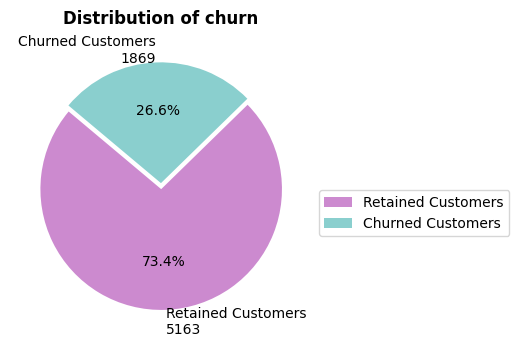

In [22]:
# Count the occurrences of each unique value in the 'churn' column
plot_dist(['churn'], (14,10), (0.05,0), ['Retained Customers', 'Churned Customers'])

About ~27% of the customers are churned

### Demographic Features and Churn Rate

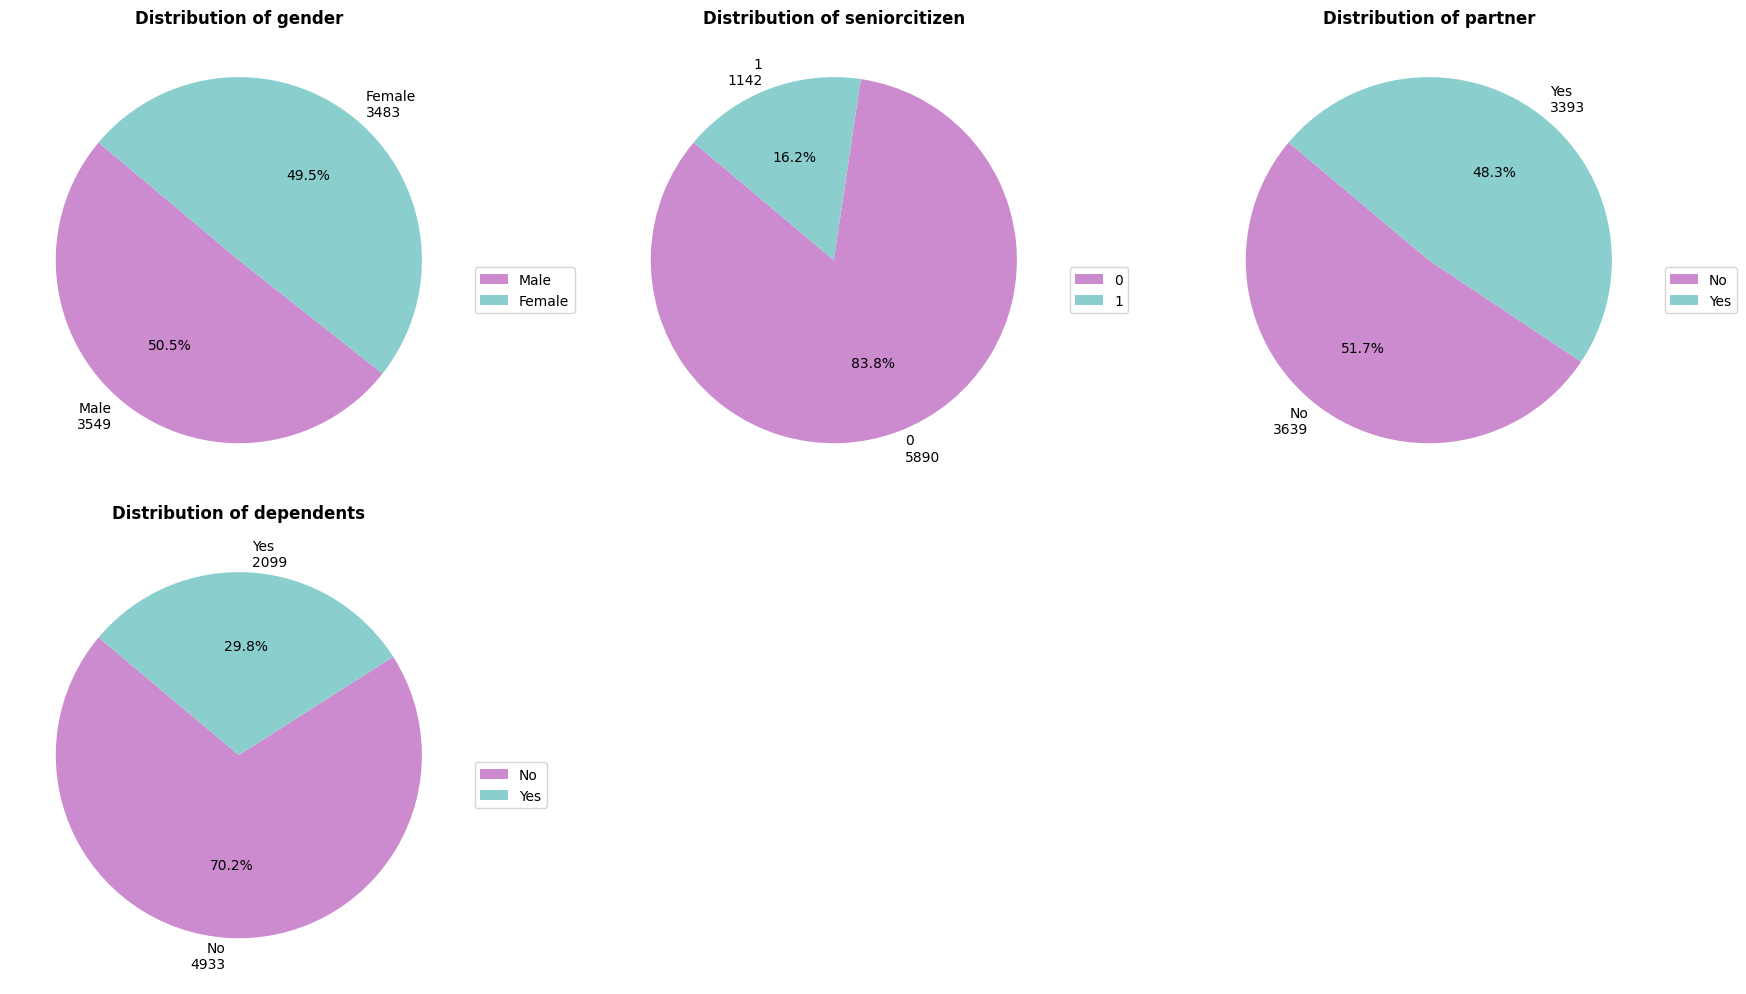

In [23]:
# See general distribution of the following features 
features=['gender', 'seniorcitizen', 'partner', 'dependents']
plot_dist(features, (18, 15))

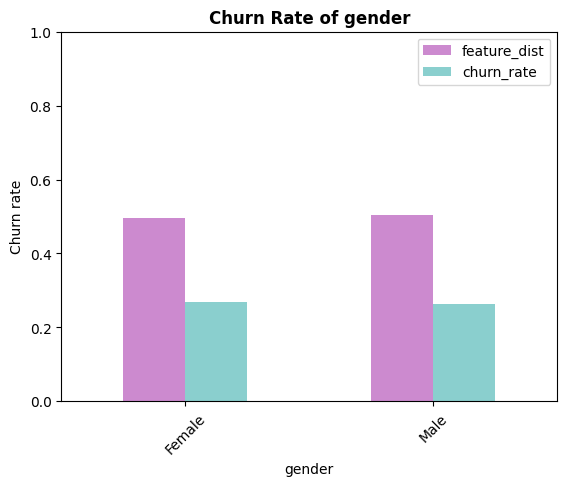

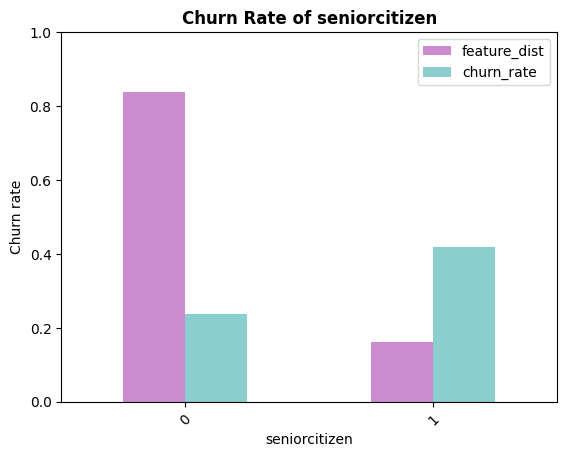

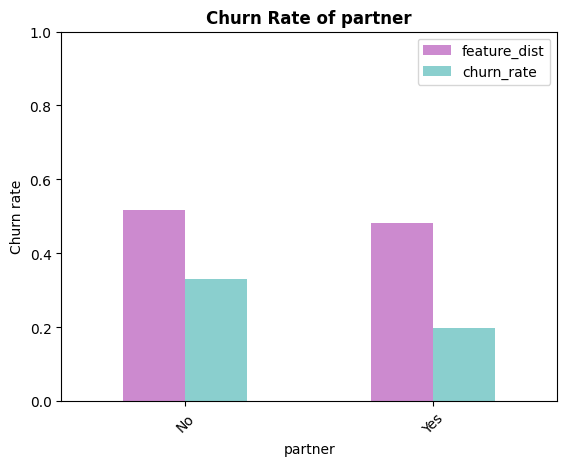

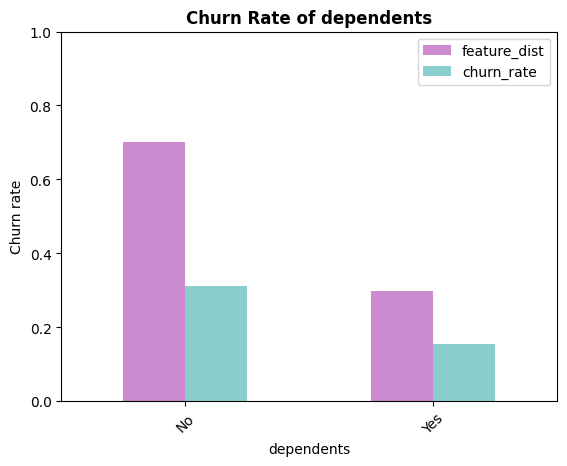

In [24]:
# See general distribution of the following features compared to churn rate
features=['gender', 'seniorcitizen', 'partner', 'dependents']
plot_dist_churn(features)

* Gender: The proportion of men and women is similar, with almost no difference in their churn rates.
* Age: Most customers are young. Senior citizens churn at nearly twice the rate of younger customers.
* Family status: Nearly half of the customers have a partner, while only about a third have dependents. Customers with a partner churn less than single customers, and those with dependents churn less than those without dependents.

### Service Features and Churn Rate

#### Service Type and Churn Rate

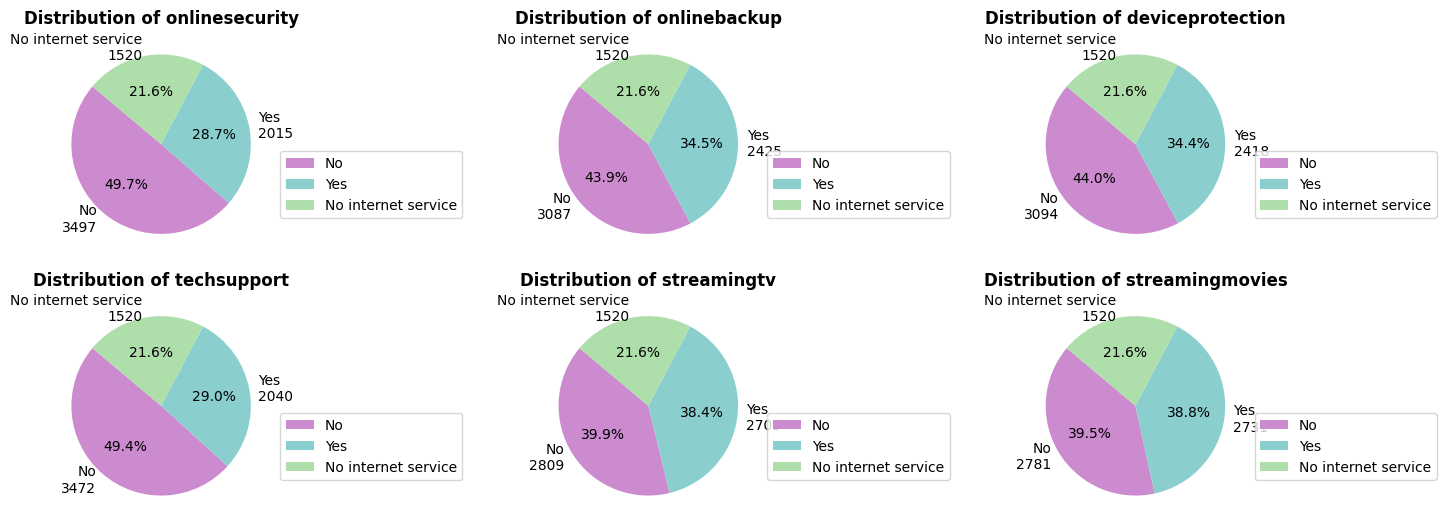

In [25]:
# See distribution of different services
service_columns = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']
plot_dist(service_columns, (15, 8))

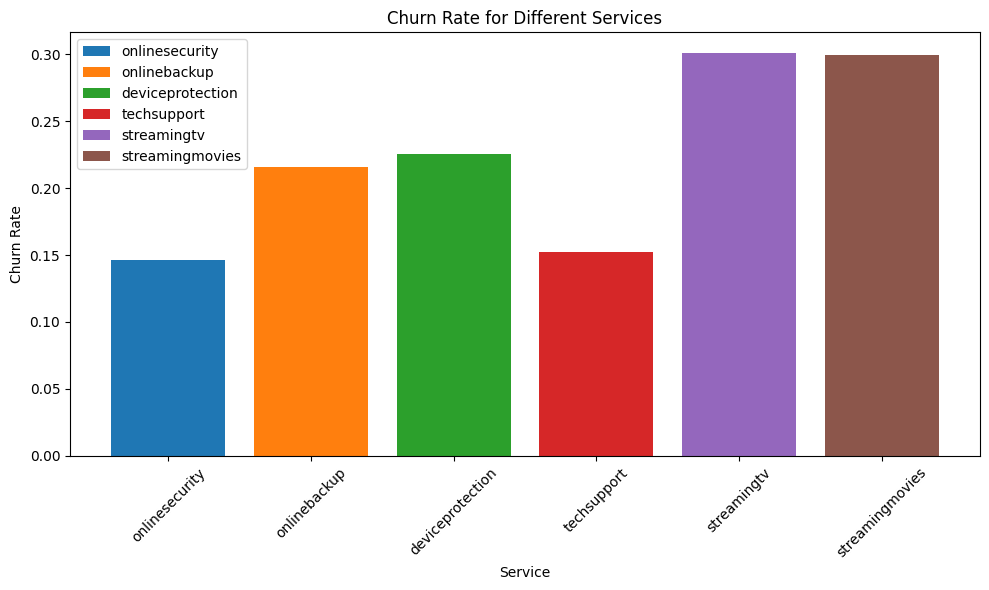

In [26]:
# Plot churn rate for all disrbution
grouped_data = {}
for column in service_columns:
    grouped_data[column] = data[data[column] == 'Yes'].groupby(column)['churn'].agg(['count', 'sum', 'mean'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for column in service_columns:
    churn_rate = grouped_data[column].loc['Yes', 'mean']
    ax.bar(column, churn_rate, label=column)

ax.set_title('Churn Rate for Different Services')
ax.set_xlabel('Service')
ax.set_ylabel('Churn Rate')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There is no additional service with a significantly higher churn rate than the average. While customers who opt for streaming services, either for streaming or movies, have a higher churn rate than average, it is not significant. It should be noted, however, that customers who have opted for technical support or online security have a lower churn rate of ~10%. Both of which are highly popular services.

#### Bundle Type and Churn Rate

In [27]:
# Creating a new feature to show if a customer picked a bundle (phone and internet), just phone, or just internet.

data['package'] = None
i=0

while i < len(data):
    if (data.loc[i, 'phoneservice'] == 'Yes') and ((data.loc[i, 'internetservice'] == 'DSL') or (data.loc[i, 'internetservice'] == 'Fiber optic')):
        data.loc[i, 'package'] = 'Bundle'
    elif (data.loc[i, 'phoneservice'] == 'Yes') and (data.loc[i, 'internetservice'] == 'No'):
        data.loc[i, 'package'] = 'Phone only'
    elif (data.loc[i, 'phoneservice'] == 'No') and ((data.loc[i, 'internetservice'] == 'DSL') or (data.loc[i, 'internetservice'] == 'Fiber optic')):
        data.loc[i, 'package'] = 'Internet only'
     
    i += 1

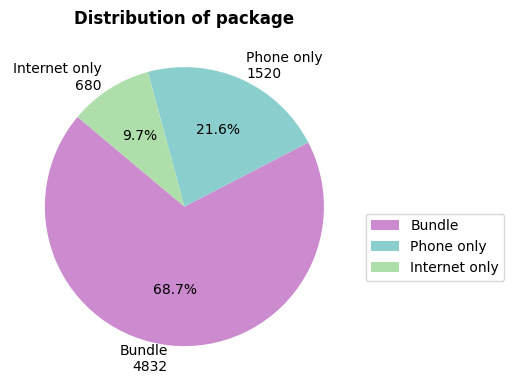

In [28]:
# Plot the feature distrbution
plot_dist(['package'], figsize=(14,14))

The majority of customers have bundles!

In [29]:
# Group by 'Bundle' and aggregate 'churn' with count, sum, and mean
churn_summary = data.groupby('package').agg({'churn': ['count', 'sum', 'mean']}).sort_values(('churn', 'mean'), ascending=False)

# Rename the columns
churn_summary.columns = ['CustomerCount', 'ChurnCount', 'ChurnRate']

churn_summary

,CustomerCount,ChurnCount,ChurnRate
package,,,
Bundle,4832,1586,0.328228
Internet only,680,170,0.250000
Phone only,1520,113,0.074342


Phone-only packages have a significantly lower churn rate than internet-only and bundle packages, almost three times lower than the internet-only and bundle packages!

### Billing Features and Churn Rate

#### Payment Method and Churn Rate

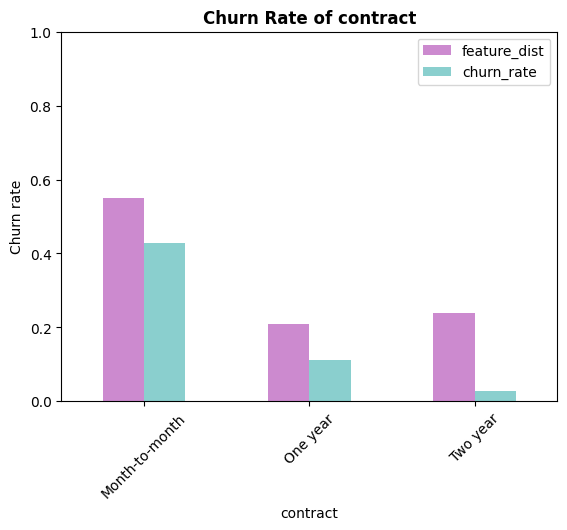

In [30]:
plot_dist_churn(['contract'])

Month-to-month contracts have the highest churn rate, almost double the average churn rate. Churn rates are lower for long-term contracts.

#### Paperless Billing and Churn Rate

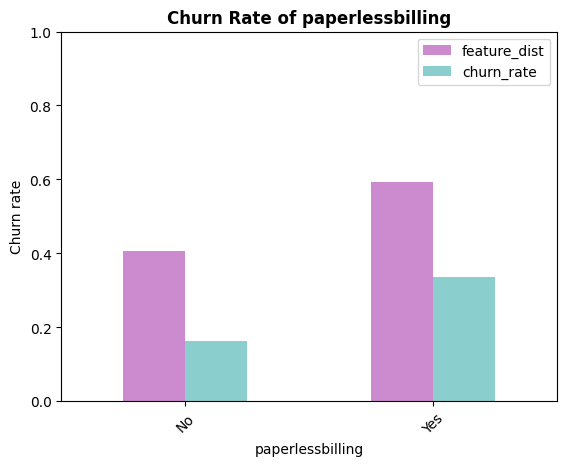

In [31]:
plot_dist_churn(['paperlessbilling'])

The churn rate seems to be reduced by paperless billing.

#### Payment Method and Churn Rate

Creating new feature called "Payment Method" based on the 'Payment Method' Column

In [32]:
data['automaticbilling'] = 'No'
data.loc[data['paymentmethod'].str.contains('automatic', case=False), 'automaticbilling'] = 'Yes'
data[['paymentmethod', 'automaticbilling']].head(10)

,paymentmethod,automaticbilling
0,Electronic check,No
1,Mailed check,No
2,Mailed check,No
3,Bank transfer (automatic),Yes
4,Electronic check,No
5,Electronic check,No
6,Credit card (automatic),Yes
7,Mailed check,No
8,Electronic check,No
9,Bank transfer (automatic),Yes


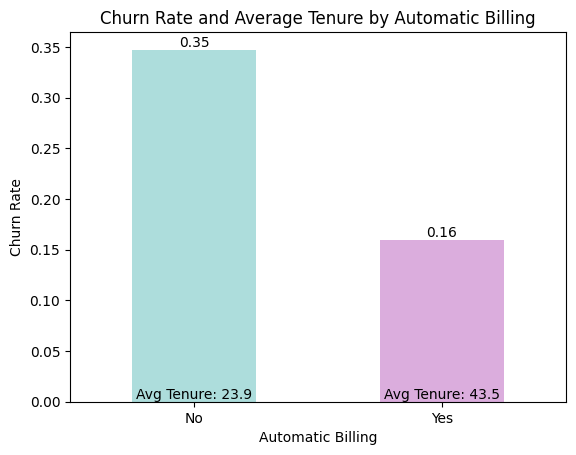

In [33]:
# Group data by 'automaticbilling' and calculate churn rate and average tenure
churn_rate_tenure_by_billing = data.groupby('automaticbilling').agg({'churn': 'mean', 'tenure': 'mean'})

# Plot the churn rate for each group
ax = churn_rate_tenure_by_billing['churn'].plot(kind='bar', color=['#8ACFCE', '#CC8ACF'], alpha=0.7, label='Churn Rate')
plt.xlabel('Automatic Billing')
plt.ylabel('Churn Rate')
plt.title('Churn Rate and Average Tenure by Automatic Billing')

# Add churn rate labels on top of each bar
for i, rate in enumerate(churn_rate_tenure_by_billing['churn']):
    ax.text(i, rate, f'{rate:.2f}', ha='center', va='bottom')

# Add average tenure annotations next to each bar
for i, tenure in enumerate(churn_rate_tenure_by_billing['tenure']):
    ax.text(i, 0, f'Avg Tenure: {tenure:.1f}', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

There is a significant disparity in churn rates and tenure between customers with automatic billing and those without. Customers with automatic billing exhibit a churn rate approximately three times higher than those without, alongside a tenure period almost half as long. This highlights the potential impact of automatic billing on customer retention and tenure duration within the observed dataset.

#### Tenure and Churn Rate

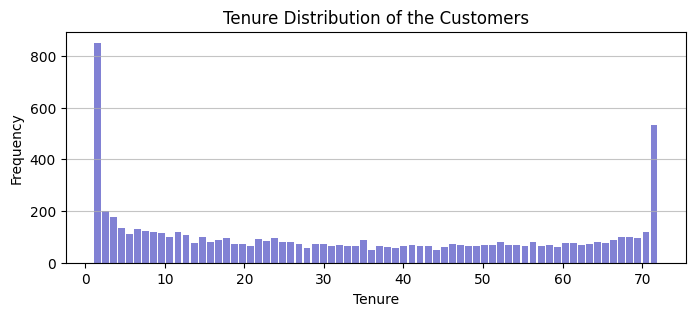

In [34]:
# Plot the histogram of 'Tenure' feature to check distrbution
plt.figure(figsize=(8, 3))
plt.hist(data['tenure'], bins=70, color='#0504aa', alpha=0.5, rwidth=0.85, label='Histogram')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Tenure Distribution of the Customers')

plt.show()

The plot shows that the majority of customers have a relatively short tenure, indicating a large proportion of new customers. A less significant but notable portion of customers have been with the company for several years, suggesting a smaller, stable base of long-term customers.

Create a new feature that will divide the customers in five tenure categories:

In [35]:
data.loc[(data['tenure'] <= 12), 'tenuregroup'] = '0-12'
data.loc[(data['tenure'] > 12) & (data['tenure'] <= 24), 'tenuregroup'] = '12-24'
data.loc[(data['tenure'] > 24) & (data['tenure'] <= 36), 'tenuregroup'] = '24-36'
data.loc[(data['tenure'] > 36) & (data['tenure'] <= 48), 'tenuregroup'] = '36-48'
data.loc[(data['tenure'] > 48), 'tenuregroup'] = '48+'

In [36]:
# Group by 'TenureGroup' and aggregate 'churn' with count, sum, and mean
churn_summary = data.groupby('tenuregroup').agg({'churn': ['count', 'sum', 'mean']}).sort_values(('churn', 'mean'), ascending=False)

# Rename the columns
churn_summary.columns = ['CustomerCount', 'ChurnCount', 'ChurnRate']

churn_summary

,CustomerCount,ChurnCount,ChurnRate
tenuregroup,,,
0-12,2175,1037,0.476782
12-24,1024,294,0.287109
24-36,832,180,0.216346
36-48,762,145,0.190289
48+,2239,213,0.095132


There is a significant trend in churn rates across customer tenure groups. Churn rates are notably higher among customers within the first year of engagement, steadily decreasing with longer tenure. Remarkably, for clients with 48 months or more of tenure, the churn rate approaches zero, indicating a strong retention pattern among long-standing customers.

#### Monthly Charges and Churn Rate

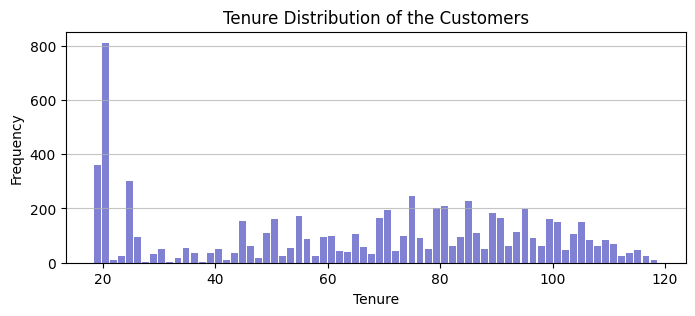

In [37]:
# Plotting the histogram for monthly billing to check distrbution
plt.figure(figsize=(8, 3))
plt.hist(data['monthlycharges'], bins=70, color='#0504aa', alpha=0.5, rwidth=0.85, label='Histogram')
plt.grid(axis='y', alpha=0.75)
plt.title('Tenure Distribution of the Customers')
plt.xlabel('Tenure')
plt.ylabel('Frequency')

plt.show()

Monthly charge bills show significant variability, but most customers have low charges. By grouping the data into quartiles, we can better understand the relationship between churn rate and monthly charges.

In [38]:
data['monthlycharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: monthlycharges, dtype: float64

In [39]:
# Create a new feature that will divide the customers in five tenure categories:

data.loc[(data['monthlycharges'] <= 30), 'monthlypayment'] = 'Low Payment'
data.loc[(data['monthlycharges'] > 30) & (data['monthlycharges'] <= 70), 'monthlypayment'] = 'Medium Payment'
data.loc[(data['monthlycharges'] > 70) & (data['monthlycharges'] <= 90), 'monthlypayment'] = 'High Payment'
data.loc[(data['monthlycharges'] > 90), 'monthlypayment'] = 'Very High Payment'

In [40]:
# Group by 'monthlypayment' and aggregate 'churn' with count, sum, and mean
churn_summary = data.groupby('monthlypayment').agg({'churn': ['count', 'sum', 'mean']}).sort_values(('churn', 'mean'), ascending=False)
churn_summary.columns = churn_summary.columns.map('_'.join)
avg_payment = data.groupby('monthlypayment')['monthlycharges'].mean().reset_index()
churn_summary = pd.merge(churn_summary, avg_payment, on='monthlypayment')
churn_summary.columns = ['PaymentGroup', 'CustomerCount', 'ChurnCount', 'ChurnRate', 'AvgPayment']
churn_summary

,PaymentGroup,CustomerCount,ChurnCount,ChurnRate,AvgPayment
0,High Payment,1842,697,0.378393,80.063301
1,Very High Payment,1739,570,0.327775,101.018689
2,Medium Payment,1804,440,0.243902,53.823975
3,Low Payment,1647,162,0.098361,21.502398


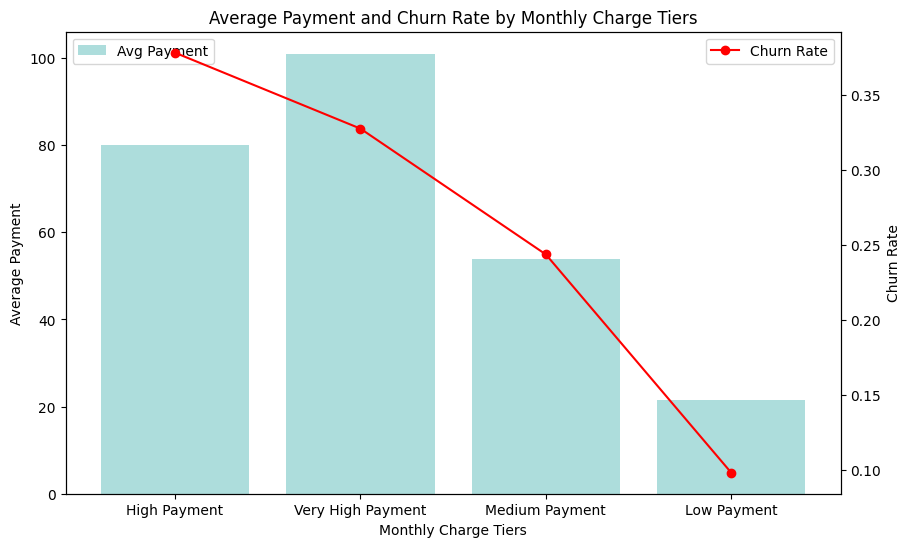

In [41]:
# Plot churn summary
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for Average Payment
ax1.bar(churn_summary['PaymentGroup'], churn_summary['AvgPayment'], color='#8ACFCE', alpha=0.7, label='Avg Payment')
ax1.set_xlabel('Monthly Charge Tiers')
ax1.set_ylabel('Average Payment')
ax1.set_title('Average Payment and Churn Rate by Monthly Charge Tiers')

# Create a second y-axis for Churn Rate
ax2 = ax1.twinx()

# Line chart for Churn Rate
ax2.plot(churn_summary['PaymentGroup'], churn_summary['ChurnRate'], color='red', marker='o', label='Churn Rate')
ax2.set_ylabel('Churn Rate')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

There appears to be a clear correlation between monthly charge tiers and customer churn. Higher payment tiers are associated with higher churn rates, with the top quartile experiencing nearly four times the churn rate of the lowest quartile. 

***
# Data Prep
***

In [42]:
data.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn', 'package',
       'automaticbilling', 'tenuregroup', 'monthlypayment'],
      dtype='object')

In [43]:
# Reorder columns 
cols = ['churn'] + [col for col in data.columns if col != 'churn']
data = data[cols]
data.head(3)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,package,automaticbilling,tenuregroup,monthlypayment
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,Internet only,No,0-12,Low Payment
1,0,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,Bundle,No,24-36,Medium Payment
2,1,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Bundle,No,0-12,Medium Payment


In [44]:
# Drop columns that were created during the EDA phsase that groups differnt features
if 'monthlypayment' in data.columns or 'tenuregroup' in data.columns:
    data = data.drop(columns=['monthlypayment', 'tenuregroup'], axis=1)

#### Map categorical binary columns into numeric binary variables:

In [45]:
# Take a look at the unique values for each feature above: only columns with 'Yes' or 'No' values are assigned binary values.

columns_to_map = ['seniorcitizen', 'partner', 'dependents', 'phoneservice', 'paperlessbilling', 'automaticbilling', 'churn']

for col in columns_to_map:
    if set(data[col].unique()) == {0, 1}:  # Check if values are already numeric (0 and 1)
        continue  # Skip mapping, as values are already numeric
    elif set(data[col].unique()) == {'Yes', 'No'}:  # Check if values are 'Yes' or 'No'
        data[col] = data[col].map({'Yes': 1, 'No': 0})  # Assigning the result back to the DataFrame

data.loc[:, columns_to_map].head(5)

,seniorcitizen,partner,dependents,phoneservice,paperlessbilling,automaticbilling,churn
0,0,1,0,0,1,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,1,0,1
3,0,0,0,0,0,1,0
4,0,0,0,1,1,0,1


#### Convert non-binary categorical features into dummy variables:

In [46]:
data = pd.get_dummies(data)

# Change bool values to int
for column in data.columns:
    if data[column].dtype == bool:
        data[column] = data[column].astype(int)

# Show all columns in preview
pd.options.display.max_columns = len(data.columns)

data.head(5)

,churn,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,automaticbilling,gender_Female,gender_Male,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,package_Bundle,package_Internet only,package_Phone only
0,0,0,1,0,1,0,1,29.85,29.85,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
2,1,0,0,0,2,1,1,53.85,108.15,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0
3,0,0,0,0,45,0,0,42.30,1840.75,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,1,0,0,0,2,1,1,70.70,151.65,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0


Check all values are indeed numeric

In [47]:
data.dtypes

churn                                        int32
seniorcitizen                                int64
partner                                      int64
dependents                                   int64
tenure                                       int64
phoneservice                                 int64
paperlessbilling                             int64
monthlycharges                             float64
totalcharges                               float64
automaticbilling                             int64
gender_Female                                int32
gender_Male                                  int32
multiplelines_No                             int32
multiplelines_No phone service               int32
multiplelines_Yes                            int32
internetservice_DSL                          int32
internetservice_Fiber optic                  int32
internetservice_No                           int32
onlinesecurity_No                            int32
onlinesecurity_No internet serv

In [48]:
# Make sure again no missing values 
data.isna().sum()

churn                                      0
seniorcitizen                              0
partner                                    0
dependents                                 0
tenure                                     0
phoneservice                               0
paperlessbilling                           0
monthlycharges                             0
totalcharges                               0
automaticbilling                           0
gender_Female                              0
gender_Male                                0
multiplelines_No                           0
multiplelines_No phone service             0
multiplelines_Yes                          0
internetservice_DSL                        0
internetservice_Fiber optic                0
internetservice_No                         0
onlinesecurity_No                          0
onlinesecurity_No internet service         0
onlinesecurity_Yes                         0
onlinebackup_No                            0
onlineback

***
# Finding interesting relationships
***

In [49]:
corr = data.corr()
corr

,churn,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,automaticbilling,gender_Female,gender_Male,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,package_Bundle,package_Internet only,package_Phone only
churn,1.000000,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.191454,0.192858,-0.199484,-0.210420,0.008545,-0.008545,-0.032654,-0.011691,0.040033,-0.124141,0.307463,-0.227578,0.342235,-0.227578,-0.171270,0.267595,-0.227578,-0.082307,0.252056,-0.227578,-0.066193,0.336877,-0.227578,-0.164716,0.128435,-0.227578,0.063254,0.130920,-0.227578,0.060860,0.404565,-0.178225,-0.301552,-0.118136,-0.134687,0.301455,-0.090773,0.209490,-0.011691,-0.227578
seniorcitizen,0.150541,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219874,0.102411,-0.033775,0.001819,-0.001819,-0.136377,-0.008392,0.142996,-0.108276,0.254923,-0.182519,0.185145,-0.182519,-0.038576,0.087539,-0.182519,0.066663,0.094403,-0.182519,0.059514,0.205254,-0.182519,-0.060577,0.048664,-0.182519,0.105445,0.034196,-0.182519,0.119842,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987,0.167385,-0.008392,-0.182519
partner,-0.149982,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097825,0.319072,0.161327,0.001379,-0.001379,-0.130028,-0.018397,0.142561,-0.001043,0.001235,-0.000286,-0.129394,-0.000286,0.143346,-0.135626,-0.000286,0.141849,-0.146702,-0.000286,0.153556,-0.108875,-0.000286,0.120206,-0.123394,-0.000286,0.124483,-0.117488,-0.000286,0.118108,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948,0.011980,-0.018397,-0.000286
dependents,-0.163128,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112343,0.064653,0.094464,-0.010349,0.010349,0.023388,0.001078,-0.024307,0.051593,-0.164101,0.138383,-0.186979,0.138383,0.080786,-0.137421,0.138383,0.023639,-0.128053,0.138383,0.013900,-0.171164,0.138383,0.063053,-0.099912,0.138383,-0.016499,-0.078245,0.138383,-0.038375,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448,-0.123540,0.001078,0.138383
tenure,-0.354049,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246862,0.825880,0.396772,-0.005285,0.005285,-0.323891,-0.007877,0.332399,0.013786,0.017930,-0.037529,-0.265987,-0.037529,0.328297,-0.314769,-0.037529,0.361138,-0.314820,-0.037529,0.361520,-0.264363,-0.037529,0.325288,-0.246814,-0.037529,0.280264,-0.252890,-0.037529,0.285402,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181,0.038338,-0.007877,-0.037529
phoneservice,0.011691,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.248033,0.113008,0.001159,0.007515,-0.007515,0.315218,-1.000000,0.279530,-0.452255,0.290183,0.171817,-0.058546,0.171817,-0.091676,-0.092579,0.171817,-0.052133,-0.075421,0.171817,-0.070076,-0.055102,0.171817,-0.095138,-0.123159,0.171817,-0.021383,-0.111273,0.171817,-0.033477,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463,0.484899,-1.000000,0.171817
paperlessbilling,0.191454,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351930,0.157830,-0.025975,0.011902,-0.011902,-0.151974,-0.016696,0.163746,-0.063390,0.326470,-0.320592,0.267592,-0.320592,-0.004051,0.144218,-0.320592,0.127056,0.166253,-0.320592,0.104079,0.229875,-0.320592,0.037536,0.046715,-0.320592,0.224241,0.058987,-0.320592,0.211583,0.168296,-0.0522

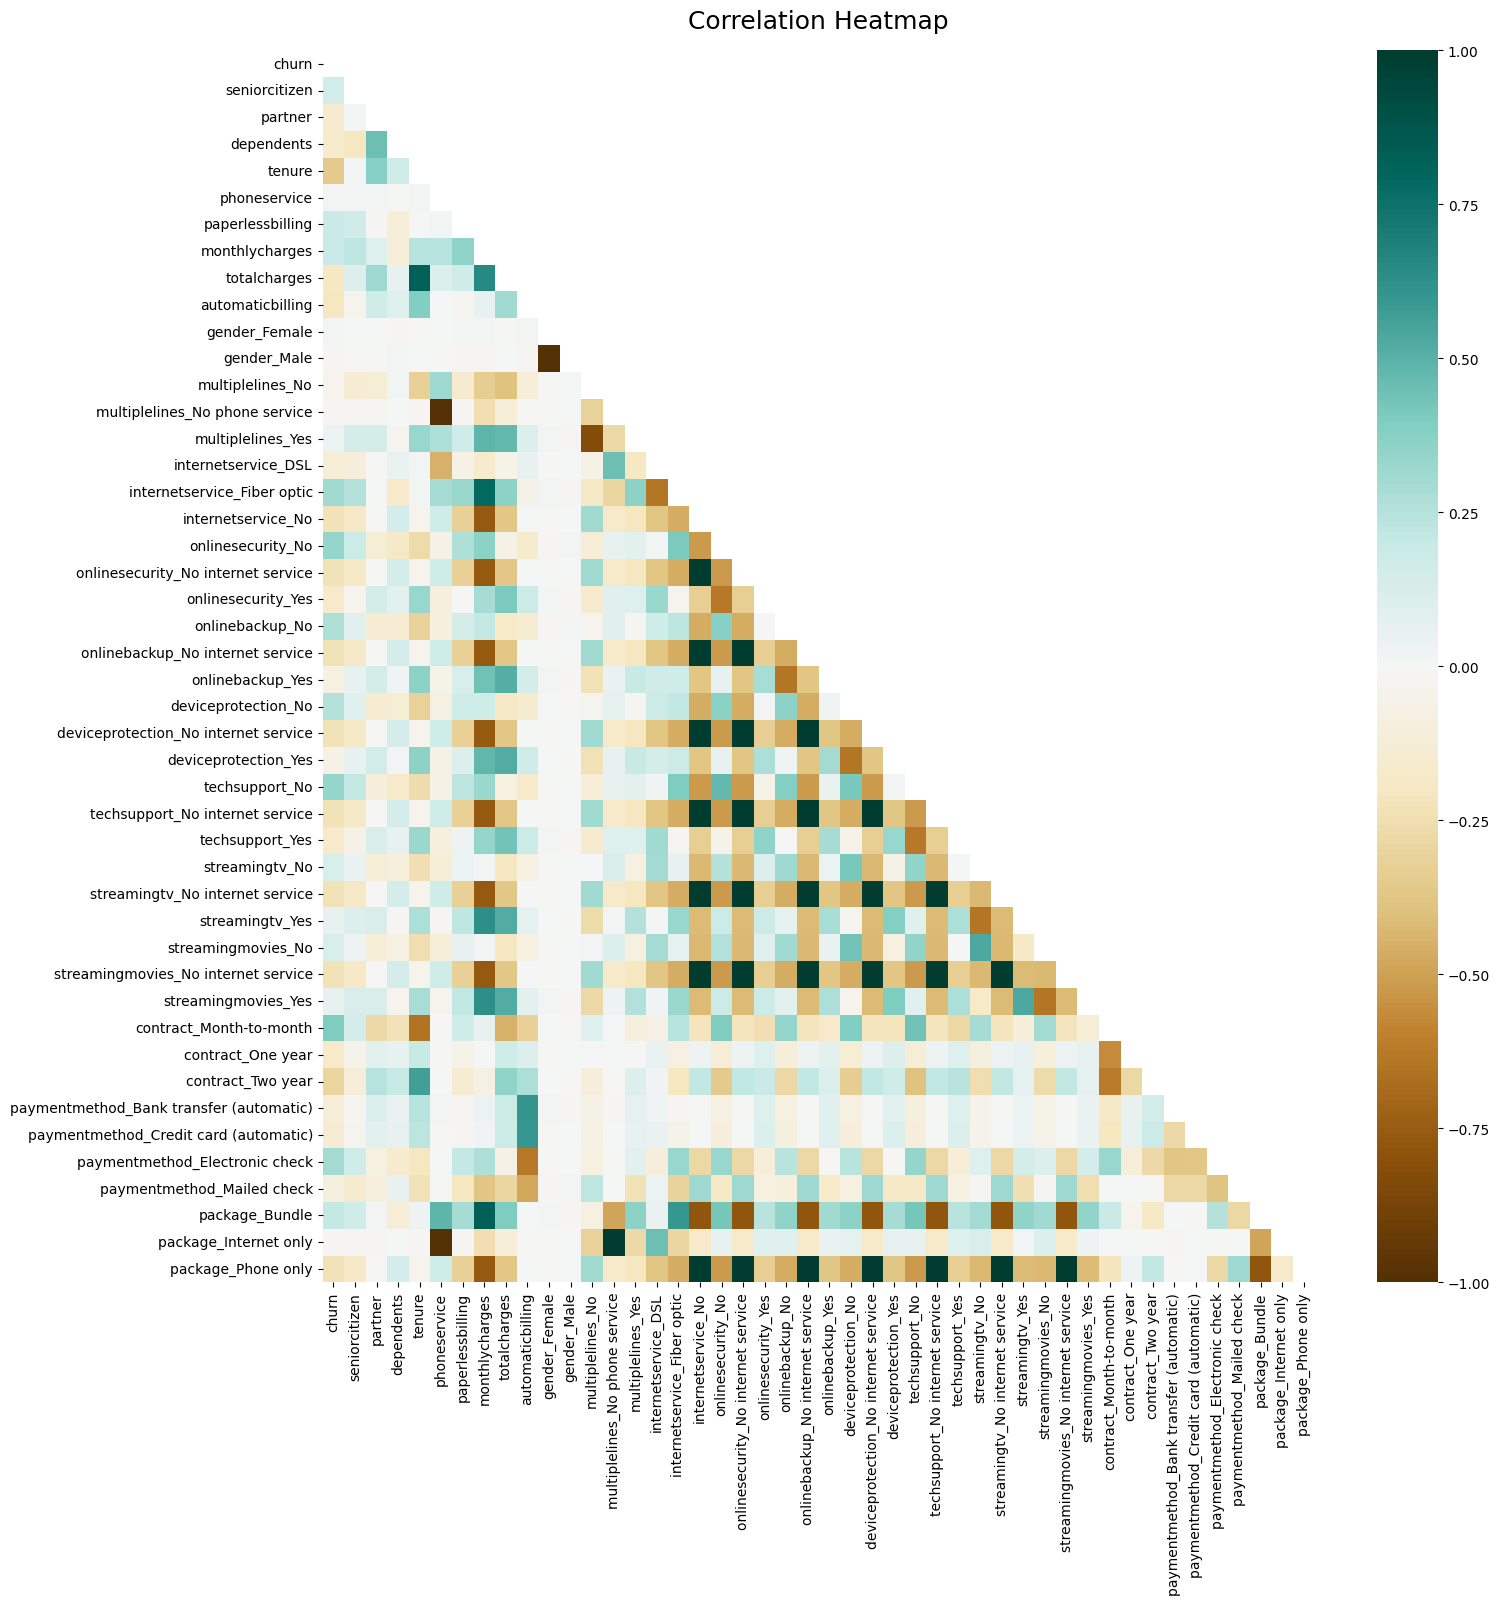

In [50]:
# Correlation between all variables:

plt.figure(figsize=(16, 16))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=False, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

plt.show()

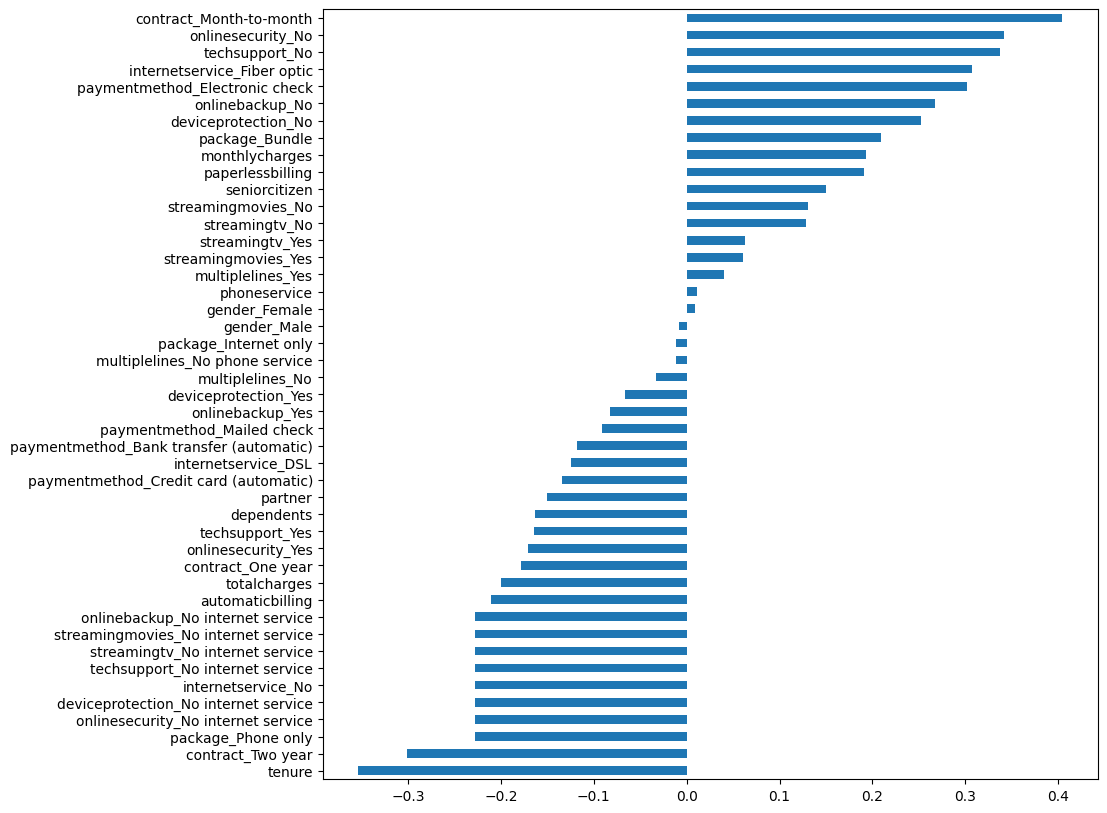

In [51]:
corr['churn'].drop('churn').sort_values(ascending=True).plot(kind='barh',figsize=(10, 10))
plt.show()

- The most significant factors influencing the churn rate are **tenure** and **contract type**. Short-term contracts are associated with a higher churn rate, while long-term contracts are linked to a lower churn rate. Additionally, tenure impacts the churn rate; long-term customers typically have lower churn rates, whereas most customers who churn have been with the company for less than one year.
- **Phone-only** packages have a lower churn rate compared to internet packages. However, certain extra services in internet packages, such as **online security** and **tech support**, tend to reduce the churn rate among internet customers.

***
# ML
***

### Reload & Reclean Data

In [52]:
data = pd.read_csv('churn.csv') #reload data
data = data.rename(columns=str.lower) #rename columns
data['churn'] = (data['churn'] == 'Yes').astype('int') #churn to 0-1
data['totalcharges'] = pd.to_numeric(data['totalcharges'], errors='coerce') #change totalcharges dt to numeric
data.dropna(inplace=True) #drop null
data.reset_index(inplace=True, drop=True) #reset index after dropping nulls

###create package feature###
data['package'] = None

i=0

while i < len(data):
    if (data.loc[i, 'phoneservice'] == 'Yes') and ((data.loc[i, 'internetservice'] == 'DSL') or (data.loc[i, 'internetservice'] == 'Fiber optic')):
        data.loc[i, 'package'] = 'Bundle'
    elif (data.loc[i, 'phoneservice'] == 'Yes') and (data.loc[i, 'internetservice'] == 'No'):
        data.loc[i, 'package'] = 'Phone only'
    elif (data.loc[i, 'phoneservice'] == 'No') and ((data.loc[i, 'internetservice'] == 'DSL') or (data.loc[i, 'internetservice'] == 'Fiber optic')):
        data.loc[i, 'package'] = 'Internet only'
     
    i += 1
    
###create automatic billing feature###
data['automaticbilling'] = 'No'
data.loc[data['paymentmethod'].str.contains('automatic', case=False), 'automaticbilling'] = 'Yes'

#change binary columns to 0-1
columns_to_map = ['seniorcitizen', 'partner', 'dependents', 'phoneservice', 'paperlessbilling', 'automaticbilling', 'churn']

for col in columns_to_map:
    if set(data[col].unique()) == {0, 1}:  # Check if values are already numeric (0 and 1)
        continue  # Skip mapping, as values are already numeric
    elif set(data[col].unique()) == {'Yes', 'No'}:  # Check if values are 'Yes' or 'No'
        data[col] = data[col].map({'Yes': 1, 'No': 0})  # Assigning the result back to the DataFrame

# Change 'customerid' values to number
data['customerid'] = range(1, len(data) + 1)

#get_dummies
data = pd.get_dummies(data)

# Change bool values to int
for column in data.columns:
    if data[column].dtype== bool:
        data[column] = data[column].astype(int)
        
data.head(5)

,customerid,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn,automaticbilling,gender_Female,gender_Male,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,...,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,package_Bundle,package_Internet only,package_Phone only
0,1,0,1,0,1,0,1,29.85,29.85,0,0,1,0,0,1,0,1,0,0,1,0,0,0,...,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
1,2,0,0,0,34,1,0,56.95,1889.50,0,0,0,1,1,0,0,1,0,0,0,0,1,1,...,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
2,3,0,0,0,2,1,1,53.85,108.15,1,0,0,1,1,0,0,1,0,0,0,0,1,0,...,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0
3,4,0,0,0,45,0,0,42.30,1840.75,0,1,0,1,0,1,0,1,0,0,0,0,1,1,...,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,5,0,0,0,2,1,1,70.70,151.65,1,0,1,0,1,0,0,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0


In [53]:
# No missing values!
data.isna().sum()

customerid                                 0
seniorcitizen                              0
partner                                    0
dependents                                 0
tenure                                     0
phoneservice                               0
paperlessbilling                           0
monthlycharges                             0
totalcharges                               0
churn                                      0
automaticbilling                           0
gender_Female                              0
gender_Male                                0
multiplelines_No                           0
multiplelines_No phone service             0
multiplelines_Yes                          0
internetservice_DSL                        0
internetservice_Fiber optic                0
internetservice_No                         0
onlinesecurity_No                          0
onlinesecurity_No internet service         0
onlinesecurity_Yes                         0
onlineback

In [54]:
# Change to float datatype
data = data.astype(float)

In [55]:
# Check all values are indeed numeric (float)
data.dtypes

customerid                                 float64
seniorcitizen                              float64
partner                                    float64
dependents                                 float64
tenure                                     float64
phoneservice                               float64
paperlessbilling                           float64
monthlycharges                             float64
totalcharges                               float64
churn                                      float64
automaticbilling                           float64
gender_Female                              float64
gender_Male                                float64
multiplelines_No                           float64
multiplelines_No phone service             float64
multiplelines_Yes                          float64
internetservice_DSL                        float64
internetservice_Fiber optic                float64
internetservice_No                         float64
onlinesecurity_No              

## Setting a baseline

In [56]:
data.shape

(7032, 47)

There are 7032 examples, 1400 will be used for test and the rest for train and split to inputs and labels

In [57]:
train, test = train_test_split(data, test_size=1400, random_state=0, shuffle=True)

In [58]:
x_train = train.drop('churn', axis=1)
x_train = x_train.drop('customerid', axis=1) 

y_train = train['churn']
cst_train = train['customerid']

x_test = test.drop('churn', axis=1)
x_test = x_test.drop('customerid', axis=1)

y_test = test['churn']
cst_test = test['customerid']

In [59]:
def get_baseline_predictions(x, baseline_value):
    return np.ones(len(x))*baseline_value


baseline_value = 0  

y_test_pred_baseline = get_baseline_predictions(x_test, baseline_value)

baseline_accuracy = round(accuracy_score(y_test, y_test_pred_baseline), 3)
baseline_accuracy

0.739

**The baseline accuracy is 73.9%, meaning if a model can predict better than that, it is an improvment compared to the baseline :)**

## Decision Tree

Run forest tree model with depth of 3

In [60]:
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(x_train, y_train) # running the algorithm with the train data

y_test_pred_dt = dt.predict(x_test) # making a prediction based on "test" data features

output = pd.DataFrame({'customerid': cst_test, 'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_dt}) # saving results to DataFrame
output

,customerid,churn_what_actualy_happened,churn_predicted_by_model
5552,5553.0,0.0,0.0
5805,5806.0,0.0,0.0
2640,2641.0,0.0,0.0
3976,3977.0,1.0,0.0
6429,6430.0,1.0,1.0
...,...,...,...
3965,3966.0,0.0,0.0
4913,4914.0,0.0,0.0
6252,6253.0,0.0,0.0
1864,1865.0,0.0,0.0


In [61]:
test_acc = accuracy_score(y_test, y_test_pred_dt)
test_acc

0.7892857142857143

**A decision tree with three levels achieves a 78.9% accuracy rate, which is an improvement compared to the baseline accuracy of 73.9%.**

Check optimal accuracy for max_depth

In [62]:
# List to store the accuracy results for each depth
results = []
max_depth_list = np.arange(2,1000)

for max_depth in max_depth_list:
    dt = DecisionTreeClassifier(max_depth=max_depth,random_state=1)
    dt.fit(x_train, y_train)
    y_test_pred = dt.predict(x_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    results.append({'max_depth': max_depth, 'accuracy': accuracy})

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='accuracy', ascending=False)


results_df.head(5)

,max_depth,accuracy
2,4,0.795714
1,3,0.789286
3,5,0.787143
4,6,0.785714
5,7,0.776429


**The optimal accuracy is achieved with a decision tree of 4 depths**

To demonstrate the overfitting problem in a decision tree, we can create a graph that shows the accuracy decrease as the depth of the tree increases:

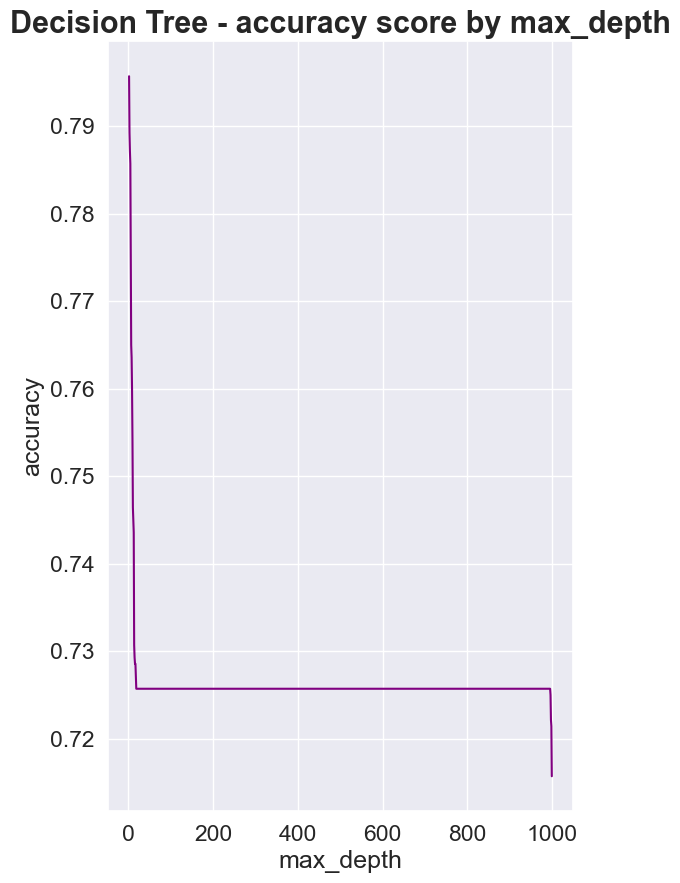

In [63]:
plt.figure(figsize=(6,10))
sns.set(font_scale=1.5)
x = np.array(max_depth_list)
plt.plot(x, results_df['accuracy'], label = 'accuracy', c='purple')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Decision Tree - accuracy score by max_depth', fontsize=22, weight='bold')
plt.show()

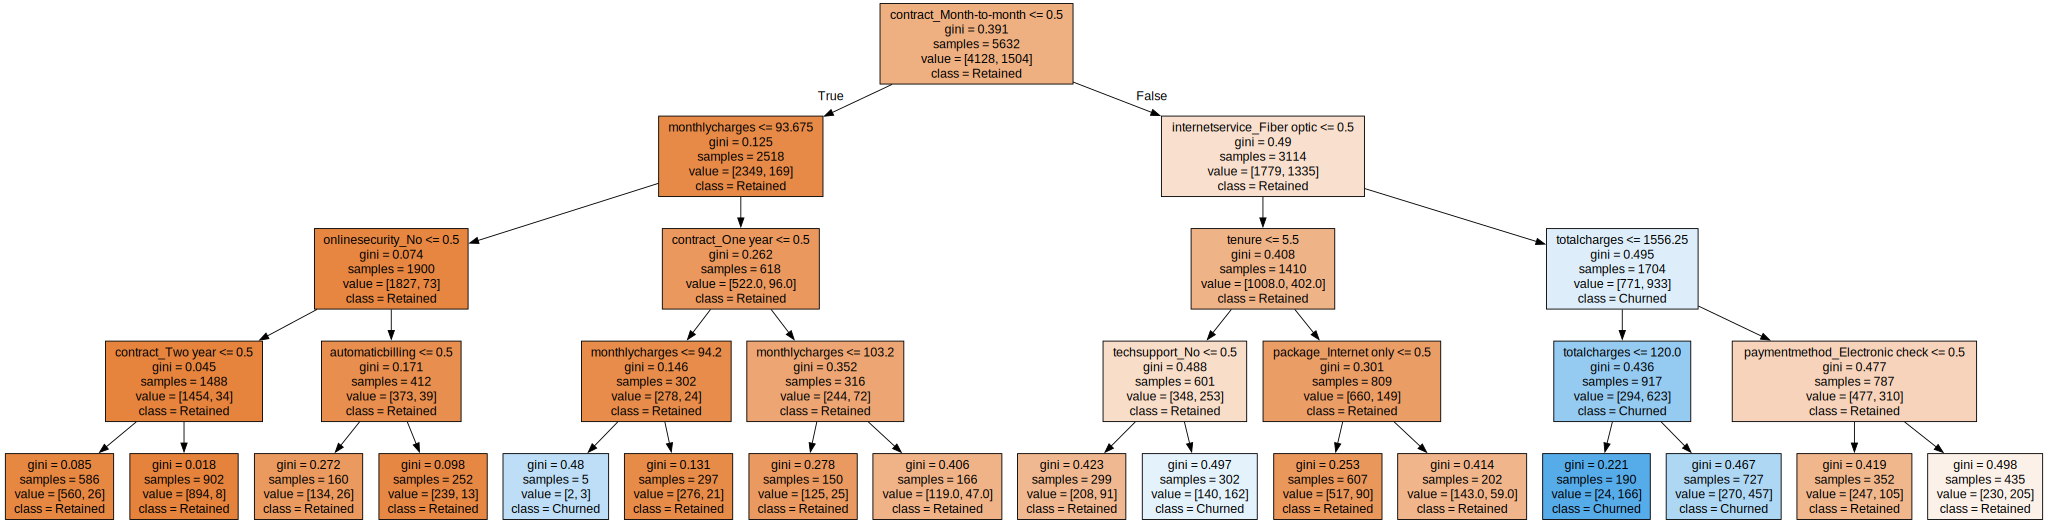

In [64]:
# Run decision tree algorihtm with optimal depth

optimal_depth = int(results_df.iloc[0]['max_depth'])

clf = DecisionTreeClassifier(max_depth=optimal_depth, random_state=1)
clf.fit(x_train, y_train) 
y_test_pred_DecisionTree = clf.predict(x_test) 


# plot tree
def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

plot_tree(clf, x_train.columns, ['Retained', 'Churned'])

Optimal depth of decision tree is 4 levels is accuracy score of 0.79%

## Random Forest

Run random forest model with depth of 3 and 100 decision trees

In [65]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

model.fit(x_train, y_train) 

y_test_pred_RandomForest = model.predict(x_test) 

output = pd.DataFrame({'customerid': cst_test, 'churned_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_RandomForest})
output

,customerid,churned_what_actualy_happened,churn_predicted_by_model
5552,5553.0,0.0,0.0
5805,5806.0,0.0,0.0
2640,2641.0,0.0,0.0
3976,3977.0,1.0,1.0
6429,6430.0,1.0,1.0
...,...,...,...
3965,3966.0,0.0,0.0
4913,4914.0,0.0,0.0
6252,6253.0,0.0,0.0
1864,1865.0,0.0,0.0


In [66]:
test_acc = accuracy_score(y_test, y_test_pred_dt)
test_acc

0.7892857142857143

**A random forest model with 100 trees and 5 max levels achieves a 78.9% accuracy rate, which is an improvement compared to the baseline accuracy of 73.9% and similar to the decision tree optimal result**

Check optimal accuracy for max_depth and n_estimators

In [ ]:
# List to store the accuracy results for each depth
results = []
max_depth_list = np.arange(2, 50)
max_trees_list = np.arange(2, 50)

for max_trees in max_trees_list:
    for max_depth in max_depth_list:
        dt = RandomForestClassifier(n_estimators=max_trees, max_depth=max_depth, random_state=1)
        dt.fit(x_train, y_train)
        y_test_pred = dt.predict(x_test)
        accuracy = accuracy_score(y_test, y_test_pred)
        results.append({'max_depth': max_depth, 'max_trees': max_trees, 'accuracy': accuracy})

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='accuracy', ascending=False)

# See top results
results_df.head(5)

**The optimal accuracy is achieved with 5 decision trees of 5 depths, and it improves the model prediction by 2.1%**

To demonstrate the overfitting problem in a random forest, we can create a graph that shows the accuracy decrease as the number of tress & their depth increase:

In [ ]:
sns.set(font_scale=1.5)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each line for max_depth and max_trees against accuracy
sns.lineplot(data=results_df, x='max_depth', y='accuracy', label='max_depth')
sns.lineplot(data=results_df, x='max_trees', y='accuracy', label='max_trees')
plt.title('Accuracy vs Max Depth and Max Trees')
plt.xlabel('Parameter Value')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Run model with optimal features
model = RandomForestClassifier(n_estimators=7, max_depth=7, random_state=1)
model.fit(x_train, y_train) 
y_test_pred_RandomForest = model.predict(x_test) 

### Feature Importance

In [ ]:
feature_importances = model.feature_importances_ 
feature_importances 

In [ ]:
features = x_train.columns # all the features
stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) 
stats = stats.sort_values('importance', ascending=False) 

In [ ]:
# Set the font scale and figure size
sns.set(font_scale=1.2)
plt.figure(figsize=(12, 15))

# Plot the sorted feature importance
ax = sns.barplot(data=stats, y='feature', x='importance', orient='h')

# Add title and labels
plt.title('Feature Importance of Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Adjust the x-axis labels rotation
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

Short-term contracts and tenure were shown to have a significant impact on the churn rate. Additionally, the total charges can also affect churn rate, as demonstrated in the EDA.

# KNN

Run KNN model with 3 neighbors

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(x_train, y_train) 
y_test_pred_Knn = clf.predict(x_test)
output = pd.DataFrame({'customerid': cst_test, 'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_Knn}) # saving results to DataFrame
output

Check the optimal number of neighbors from 3 to 100

In [ ]:
# Define range of n_neighbors
n_neighbors_range = range(3, 101) 

accuracy_scores = {}  # Store accuracy scores for each n_neighbors

for n_neighbors in n_neighbors_range:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(x_train, y_train)
    y_test_pred_Knn = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_test_pred_Knn)
    accuracy_scores[n_neighbors] = accuracy

# Convert dictionary to DataFrame for easy viewing
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['n_neighbors', 'accuracy'])
sorted_accuracy_df = accuracy_df.sort_values(by='accuracy', ascending=False)
best_n_neighbors = sorted_accuracy_df.iloc[0]['n_neighbors'] #store the best n_neighbors in a variable
sorted_accuracy_df

**The optimal accuracy is achieved with 23 neighbors, and it improves the model prediction by almost 2%**

In [ ]:
# Run Knn model with optimal number of neghibors
clf = KNeighborsClassifier(n_neighbors=int(best_n_neighbors))
        
clf.fit(x_train, y_train) 

y_test_pred_Knn = clf.predict(x_test) 

# Compare Alogs' Accuracy - Which Algo Did Best?

In [ ]:
from sklearn.metrics import accuracy_score # importing "accuracy_score" from "sklearn.metrics"

In [ ]:
# Evaluation for Decision Tree
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

In [ ]:
# Evaluation for Random Forest
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

In [ ]:
# Evaluation for K
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

**Randon Forest did best, and it improved the baseline accuracy by more than 5%**